Hal pertama yang kita lakukan adalah mengimport beberapa library yang diperlukan. 

In [40]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.preprocessing.image import img_to_array

Perintah di bawah ini berfungsi untuk membuat environtment varibles. Fungsinya agar kita nantinya dapat mengakses konten dari kaggle secara langsung

In [41]:
os.environ['KAGGLE_USERNAME'] = "khawaritzmiabdallah"
os.environ['KAGGLE_KEY'] = "b3ba6e8c73aadffefdbfbcc67fbe18d8"

Perintah dibawah ini adalah perintah untuk melakukan download dataset secara langsung dari kaggle. aagghh/crypto-telegram-groups dapat kita temukan di bagian url saat kita membuka dataset dalam kaggle, dimana aagghh merupakan nama dari user yang memiliki dataset dan crypto-telegram-groups merupakan nama datasetnya

In [42]:
!kaggle datasets download -d aagghh/crypto-telegram-groups

crypto-telegram-groups.zip: Skipping, found more recently modified local copy (use --force to force download)


Perintah dibawah ini adalah untuk melakukan proses unzip atau mengekstrak file yang ada dalam file zip yang bersesuaian

In [43]:
!unzip -q /content/crypto-telegram-groups.zip


replace group_messages_binance.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


files.upload() merupakan method yang dilakukan untuk melakukan upload file, kemudian file tersebut disimpan kedalam variabel uploaded

In [44]:
from google.colab import files
uploaded = files.upload()

Saving district wise rainfall normal.xlsx to district wise rainfall normal (1).xlsx


Langkah selanjutnya adalah membuat dataframe dari file yang telah diupload. Disini kita menggunakan method read_excel sebab kita akan melakukan pembacaan dataset yang berekstensi .xlsx. Setelah itu kita memanggil method head(10) untuk menampilkan 10 baris pertama dalam dataframe

In [45]:
import io
data1 = pd.read_excel(io.BytesIO(uploaded['district wise rainfall normal.xlsx']))
data1.head(10)

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
5,ARUNACHAL PRADESH,SUBANSIRI F.D,28.0,48.3,85.3,101.5,140.5,228.4,217.4,182.8,159.8,75.9,20.9,11.6,1300.4,76.3,327.3,788.4,108.4
6,ARUNACHAL PRADESH,TIRAP,42.2,72.7,141.0,316.9,328.7,614.7,851.9,500.6,418.3,218.7,42.9,22.9,3571.5,114.9,786.6,2385.5,284.5
7,ARUNACHAL PRADESH,ANJAW (LOHIT),42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
8,ARUNACHAL PRADESH,LOWER DIBANG,83.7,153.9,303.5,383.6,268.0,374.2,272.0,160.5,266.7,167.2,64.0,56.0,2553.3,237.6,955.1,1073.4,287.2
9,ARUNACHAL PRADESH,CHANGLANG,70.3,170.9,367.9,554.4,334.2,526.2,460.8,291.5,353.6,275.0,64.9,74.2,3543.9,241.2,1256.5,1632.1,414.1


Dataframe yang dapat kita gunakan juga bisa menggunakan ekstensi .csv. Kemuadian kita mengisi parameternya dengan lokasi file .csv tersebut. Kita bisa menggunakan url dari file csv tersebut seperti pada langkah dibawah ini

In [46]:
data2 = pd.read_csv("http://data.bandung.go.id/dataset/8cfdbe72-adb6-4f6a-90fa-29bc34746597/resource/ccabb54f-2c7c-4bce-8487-de6ad1a01600/download/tahun-2019---data-rawan-bencana.csv")
data2

,Kode Kecamatan,Kecamatan,Kode Kelurahan,Kelurahan,Jenis Bencana,Lokasi Rawan Bencana,Perkiraan Warga Terdampak (Kepala Keluarga)
0,32.73.11,Regol,32.73.11.1007,Pasirluyu,Pohon Tumbang,Taman Bbws Citarum Harum Rw.06,0
1,32.73.11,Regol,32.73.11.1005,Ciseureuh,Banjir,Gg. Dungusema RT 03,4
2,32.73.11,Regol,32.73.11.1005,Ciseureuh,Banjir,Gg. Dungusema RT 02,4
3,32.73.11,Regol,32.73.11.1005,Ciseureuh,Banjir,Gg. Dungusema RT 06,25
4,32.73.11,Regol,32.73.11.1005,Ciseureuh,Banjir,Gg. Dungusema RT 05,5
5,32.73.11,Regol,32.73.11.1005,Ciseureuh,Banjir,Jl. Moch Toha,20
6,32.73.11,Regol,32.73.11.1005,Ciseureuh,Banjir,RW 01 RT 01 - 10,700
7,32.73.11,Regol,32.73.11.1003,Pungkur,Kebakaran,RT 03 RW 02,35
8,32.73.11,Regol,32.73.11.1003,Pungkur,Kebakaran,RT 04 RW 02,20
9,32.73.11,Regol,32.73.11.1003,Pungkur,Kebakaran,RT 07 RW 04,50


Kita juga dapat menggunakan file dengan extensi .json. Di bawah ini diperlihatkan cara untuk melakukan pembacaan terhadap file json. Pertama kita mengimpor library json. Selanjutnya kita memanggil method Open yang akan mereturn sebuah object file. Setelah itu kita panggil method load dari library json untuk mereturn sebuah object json dari object file

In [47]:
import json
  
# Opening JSON file
f = open('/content/group_messages_binance.json', )
  
# returns JSON object as 
# a dictionary
data = json.load(f)

data

[{'_': 'Message',
  'date': '2021-01-29T07:16:46+00:00',
  'edit_date': None,
  'edit_hide': False,
  'entities': [],
  'forwards': None,
  'from_id': {'_': 'PeerUser', 'user_id': 585016689},
  'from_scheduled': False,
  'fwd_from': None,
  'grouped_id': None,
  'id': 10072598,
  'legacy': False,
  'media': None,
  'media_unread': False,
  'mentioned': False,
  'message': 'BTC rekt down',
  'out': False,
  'peer_id': {'_': 'PeerChannel', 'channel_id': 1146170349},
  'pinned': False,
  'post': False,
  'post_author': None,
  'replies': {'_': 'MessageReplies',
   'channel_id': None,
   'comments': False,
   'max_id': None,
   'read_max_id': None,
   'recent_repliers': [],
   'replies': 0,
   'replies_pts': 13479936},
  'reply_markup': None,
  'reply_to': None,
  'restriction_reason': [],
  'silent': False,
  'via_bot_id': None,
  'views': None},
 {'_': 'Message',
  'date': '2021-01-29T07:16:44+00:00',
  'edit_date': None,
  'edit_hide': False,
  'entities': [],
  'forwards': None,
  'fro

In [48]:
pip install pyreadstat

Kita juga dapat menggunakan file bertipe .sav .spss yang berasal dari program SPSS. Untuk itu kita dapat menggunakan bantuan dari library bernama pyreadstat. Method read_sav berguna untuk membaca dataset berupa file .sav. Dataframe yang dihasilkan memiliki tipe numeric seperti float atau int.

In [49]:
import pyreadstat

In [50]:
df_Survey, meta = pyreadstat.read_sav('/content/drive/MyDrive/Datasets/survey.sav')

In [51]:
df_Survey

,id,sex,age,marital,child,educ,source,smoke,smokenum,op1,op2,op3,op4,op5,op6,mast1,mast2,mast3,mast4,mast5,mast6,mast7,pn1,pn2,pn3,pn4,pn5,pn6,pn7,pn8,pn9,pn10,pn11,pn12,pn13,pn14,pn15,pn16,pn17,pn18,...,pc18,Rop2,Rop4,Rop6,Rmast1,Rmast3,Rmast4,Rmast6,Rmast7,Rpss4,Rpss5,Rpss7,Rpss8,Rsest3,Rsest5,Rsest7,Rsest9,Rsest10,Rpc1,Rpc2,Rpc7,Rpc11,Rpc15,Rpc16,toptim,tmast,tposaff,tnegaff,tlifesat,tpstress,tslfest,tmarlow,tpcoiss,agegp3,agegp5,educrec,LG10negaff,MAH_1,COO_1,MAH_2
0,415.0,2.0,24.0,4.0,1.0,5.0,7.0,2.0,NaN,3.0,2.0,3.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,2.0,3.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,5.0,5.0,...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,22.0,22.0,49.0,39.0,23.0,29.0,35.0,4.0,51.0,1.0,1.0,4.0,1.623249,0.958016,0.000045,18.100643
1,9.0,1.0,39.0,3.0,1.0,5.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,5.0,4.0,2.0,4.0,2.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,5.0,3.0,3.0,3.0,2.0,5.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,3.0,...,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,4.0,19.0,21.0,35.0,35.0,30.0,22.0,34.0,5.0,40.0,2.0,3.0,4.0,1.544068,3.640753,0.015852,14.482011
2,425.0,2.0,48.0,4.0,1.0,2.0,4.0,2.0,NaN,3.0,1.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,2.0,5.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,19.0,19.0,15.0,14.0,33.0,19.0,31.0,8.0,47.0,3.0,4.0,1.0,1.146128,1.307418,0.014042,14.214291
3,307.0,1.0,41.0,5.0,1.0,2.0,1.0,2.0,0.0,3.0,1.0,5.0,3.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,2.0,5.0,5.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,...,2.0,5.0,3.0,5.0,3.0,4.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,26.0,26.0,49.0,36.0,33.0,31.0,40.0,3.0,63.0,2.0,4.0,1.0,1.556303,1.314176,0.005404,14.169411
4,440.0,1.0,23.0,1.0,2.0,5.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,1.0,3.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,1.0,2.0,2.0,3.0,5.0,4.0,4.0,3.0,4.0,5.0,18.0,23.0,12.0,11.0,16.0,27.0,21.0,4.0,46.0,1.0,1.0,4.0,1.041393,2.718887,0.000376,13.702974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,277.0,2.0,34.0,3.0,2.0,4.0,7.0,1.0,NaN,3.0,3.0,4.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,3.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,1.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,5.0,...,4.0,3.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,1.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,22.0,28.0,46.0,17.0,25.0,NaN,18.0,7.0,50.0,2.0,3.0,3.0,1.230449,6.453724,NaN,NaN
435,520.0,2.0,52.0,4.0,1.0,2.0,5.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,1.0,NaN,NaN,NaN,NaN
436,25.0,2.0,48.0,4.0,1.0,4.0,1.0,2.0,0.0,3.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,3.0,4.0,4.0,3.0,1.0,5.0,2.0,1.0,4.0,1.0,5.0,3.0,NaN,4.0,1.0,1.0,5.0,4.0,1.0,4.0,1.0,5.0,4.0,...,4.0,5.0,5.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,5.0,5.0,2.0,4.0,28.0,19.0,43.0,NaN,25.0,28.0,37.0,7.0,72.0,3.0,4.0,3.0,NaN,2.844525,0.000399,NaN
437,426.0,2.0,21.0,1.0,2.0,4.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,1.0,4.0,3.0,5.0,5.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,5.0,81.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN


Cara lain untuk menggunakan file .sav adalah dengan menggunakan pandas dengan memanggil method read_spss. Perbedaan yang dapat dilihat dibandingkan dengan method read_sav dari library pyreadstat adalah data yang berupa categoric seperti sex, marital, child dll tidak dirubah kedalam representasi numeric

In [52]:
df_Survey1 = pd.read_spss('/content/drive/MyDrive/Datasets/survey.sav')

In [53]:
df_Survey1

,id,sex,age,marital,child,educ,source,smoke,smokenum,op1,op2,op3,op4,op5,op6,mast1,mast2,mast3,mast4,mast5,mast6,mast7,pn1,pn2,pn3,pn4,pn5,pn6,pn7,pn8,pn9,pn10,pn11,pn12,pn13,pn14,pn15,pn16,pn17,pn18,...,pc18,Rop2,Rop4,Rop6,Rmast1,Rmast3,Rmast4,Rmast6,Rmast7,Rpss4,Rpss5,Rpss7,Rpss8,Rsest3,Rsest5,Rsest7,Rsest9,Rsest10,Rpc1,Rpc2,Rpc7,Rpc11,Rpc15,Rpc16,toptim,tmast,tposaff,tnegaff,tlifesat,tpstress,tslfest,tmarlow,tpcoiss,agegp3,agegp5,educrec,LG10negaff,MAH_1,COO_1,MAH_2
0,415.0,FEMALES,24.0,MARRIED FIRST TIME,YES,COMPLETED UNDERGRADUATE,LIFE IN GENERAL,NO,NaN,3.0,2.0,3.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,4.0,2.0,3.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,5.0,5.0,...,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,22.0,22.0,49.0,39.0,23.0,29.0,35.0,4.0,51.0,18 - 29,18 - 24,completed undergrad uni,1.623249,0.958016,0.000045,18.100643
1,9.0,MALES,39.0,LIVING WITH PARTNER,YES,COMPLETED UNDERGRADUATE,WORK,YES,2.0,2.0,3.0,4.0,3.0,5.0,4.0,2.0,4.0,2.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,5.0,3.0,3.0,3.0,2.0,5.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,3.0,...,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,2.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,4.0,19.0,21.0,35.0,35.0,30.0,22.0,34.0,5.0,40.0,30 - 44,33 - 40,completed undergrad uni,1.544068,3.640753,0.015852,14.482011
2,425.0,FEMALES,48.0,MARRIED FIRST TIME,YES,SOME SECONDARY,CHILDREN,NO,NaN,3.0,1.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,2.0,5.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,19.0,19.0,15.0,14.0,33.0,19.0,31.0,8.0,47.0,45+,41 - 49,did not complete high school,1.146128,1.307418,0.014042,14.214291
3,307.0,MALES,41.0,REMARRIED,YES,SOME SECONDARY,WORK,NO,0.0,3.0,1.0,5.0,3.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,2.0,5.0,5.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,...,2.0,5.0,3.0,5.0,3.0,4.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,26.0,26.0,49.0,36.0,33.0,31.0,40.0,3.0,63.0,30 - 44,41 - 49,did not complete high school,1.556303,1.314176,0.005404,14.169411
4,440.0,MALES,23.0,SINGLE,NO,COMPLETED UNDERGRADUATE,WORK,NO,0.0,3.0,2.0,3.0,2.0,1.0,3.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,1.0,2.0,2.0,3.0,5.0,4.0,4.0,3.0,4.0,5.0,18.0,23.0,12.0,11.0,16.0,27.0,21.0,4.0,46.0,18 - 29,18 - 24,completed undergrad uni,1.041393,2.718887,0.000376,13.702974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,277.0,FEMALES,34.0,LIVING WITH PARTNER,NO,SOME ADDITIONAL TRAINING,LIFE IN GENERAL,YES,NaN,3.0,3.0,4.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,3.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,1.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,5.0,...,4.0,3.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,1.0,3.0,3.0,1.0,1.0,2.0,4.0,2.0,2.0,3.0,3.0,22.0,28.0,46.0,17.0,25.0,NaN,18.0,7.0,50.0,30 - 44,33 - 40,some additional training,1.230449,6.453724,NaN,NaN
435,520.0,FEMALES,52.0,MARRIED FIRST TIME,YES,SOME SECONDARY,FAMILY,NO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45+,50+,did not complete high school,NaN,NaN,NaN,NaN
436,25.0,FEMALES,48.0,MARRIED FIRST TIME,YES,SOME ADDITIONAL TRAINING,WORK,NO,0.0,3.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,3.0,4.0,4.0,3.0,1.0,5.0,2.0,1.0,4.0,1.0,5.0,3.0,NaN,4.0,1.0,1.0,5.0,4.0,1.0,4.0,1.0,5.0,4.0,...,4.0,5.0,5.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,4.0,2.0,4.0,4.0,3.0,4.0,4.0

os.listdir() berfungsi untuk mengembalikan sebuah list yang berisi konten dari suatu folder yang dituju. List tersebut bisa berisi nama file atau nama folder yang terdapat dalam folder yang dituju. List tersebut akan digunakan nantinya untuk menampilkan gambar dengan menggunakan library PIL

In [54]:
path = os.listdir("/content/drive/MyDrive/Head Scan/")

Perintah berikut adalah untuk melakukan pembacaan file gambar dan menampilkan  menggunakan library matplotlib

Disini kita menggunakan bantuan library PIL. PIL adalah library yang berguna untuk pemrosesan gambar. Dibawah ini kita menggunakan lambda function yang memiliki fungsi seperti fungsi pada umumnya namun dengan penulisan yang lebih sederhana dengan hanya 1 baris. Tersebut akan melakukan pembacaan file gambar dalam directory yang kemudian akan diubah menjadi sebuah array agar dapat divisualisikan dengan matplotlib

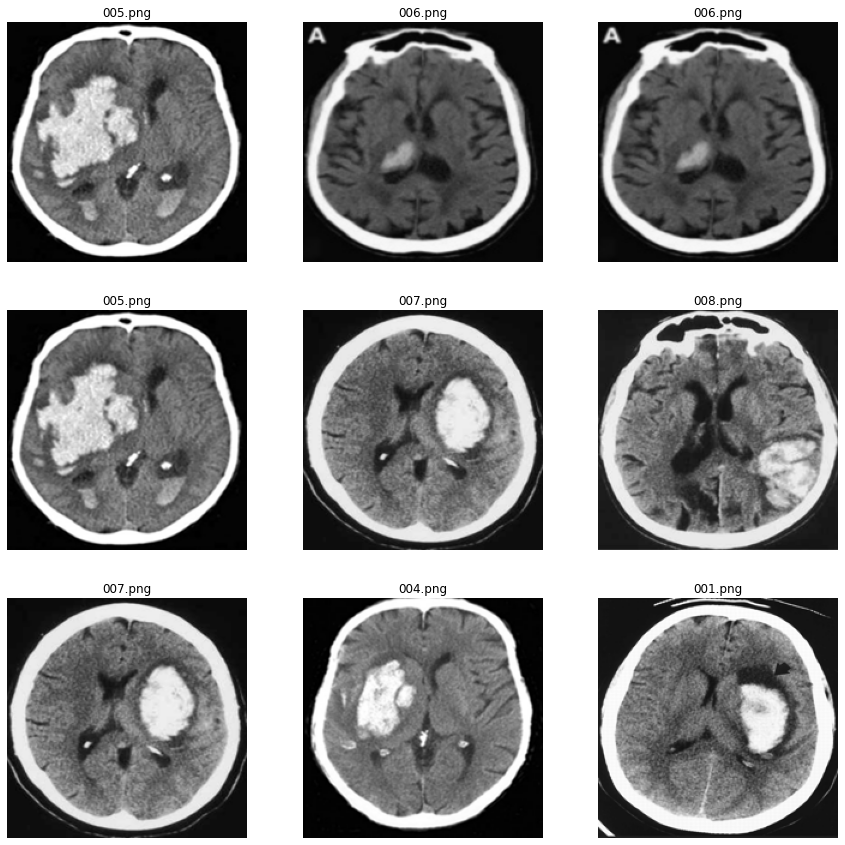

In [55]:
import PIL

# these two variables are "the parameters" of this cell
w = 3
h = 3

# this function uses the open, resize and array functions we have seen before
load_img = lambda filename: np.array(PIL.Image.open(f"/content/drive/MyDrive/Head Scan/{filename}").resize((200, 200)))

_, axes_list = plt.subplots(h, w, figsize=(5*w, 5*h)) # define a grid of (w, h)

for axes in axes_list:
    for ax in axes:
        ax.axis('off')
        img = np.random.choice(path) # take a random train filename (like 000c34352.jpg)
        ax.imshow(load_img(img)) # load and show
        ax.set_title(img)